COPY FROM t1 FOLDER: change input to have time-dependency and add LSTM model

Search for "FIXME" for tunable parameters

## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
import utils

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


Using TensorFlow backend.


## Generate data

(10000, 2)
X [[ 0.72982333  0.27017667]
 [ 0.54897761  0.45102239]
 [ 0.62569454  0.37430546]
 [ 0.79305005  0.20694995]
 [ 0.74354766  0.25645234]
 [ 0.36633656  0.63366344]
 [ 0.62189575  0.37810425]
 [ 0.47584954  0.52415046]
 [ 0.48223245  0.51776755]
 [ 0.55036207  0.44963793]]


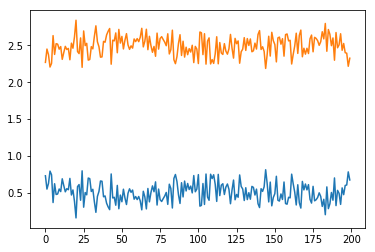

In [2]:
N=int(1e4) # FIXME 1e5

# Try dataset from https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1
from sklearn.preprocessing import scale
def data1(n_samples:int=2000):
    n_features=5
    # n_samples, n_features = 2000, 5
    # X = np.random.uniform(0, 1, (n_samples, n_features))
    X = np.zeros((n_samples,n_features))
    
    sigma = 0.1
    xt=np.arange(0,n_samples/10,1/10)
    X[:,0] = .5 + .5*np.sin(1*xt) + np.random.normal(0, sigma, N) +1 # first sine wave
    X[:,1] = .5 + .5*np.sin(2*xt) + np.random.normal(0, sigma, N) +1 # second sine wave
    X[:,2] = 1*np.cos(1*xt) + np.random.normal(0, sigma, N) +1 # lagged version of first sine wave
    X[:,3] = X[:,1]*X[:, 2] # some non-linear relations between lagged and other
    X[:,4] = X[:,1]**2 * X[:, 0]**3 # some non-linear relations between 2 sines
    # auto-encoders need [0-1] range data
    # If PCA input is (mean=0,std=1) and AE is [0-1], MSE is incomparable
    # X = scale(X)
    X = utils.myNorm3(X)
    return X

def data2(n_samples:int=2000):
    n_features=2
    # n_samples, n_features = 2000, 5
    # X = np.random.uniform(0, 1, (n_samples, n_features))
    X = np.zeros((n_samples,n_features), dtype=np.float64)
    sigma = 0.1
    xt=np.arange(0,n_samples/10,1/10)
    X[:,0] = np.random.normal(0, sigma, N) +1 # first sine wave
    X[:,1] = -1*X[:,0]
    X = utils.myNorm3(X)
    return X

X = data2(N)

print(X.shape)
print('X',X[0:10,:])

utils.myPlot(X,2)

(10000, 2)


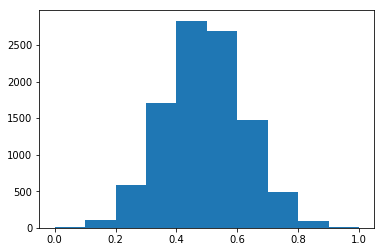

In [3]:
print(X.shape)
from matplotlib import pyplot as plt
plt.hist(X[:,0])
plt.show()

## Try AE and visualize with tensorboard

Results
- AE-1    : n epochs = 200, data from data2, normalized rmse = 1.3 %
- AE-10-1 : n epochs = 200, data from data2, normalized rmse = 1.3 %
- AE-10   : n epochs = 200, data from data2, normalized rmse = 0.58 %
- AE-20   : n epochs = 200, data from data2, normalized rmse = 0.59 %
- AE-2    : n epochs = 200, data from data2, normalized rmse = 1.3 %

autoencoder
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kerne

/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1977: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 1/200
0s - loss: 0.0254 - val_loss: 0.0217
Epoch 2/200
0s - loss: 0.0193 - val_loss: 0.0169
Epoch 3/200
0s - loss: 0.0151 - val_loss: 0.0134
Epoch 4/200
0s - loss: 0.0122 - val_loss: 0.0110
Epoch 5/200
0s - loss: 0.0101 - val_loss: 0.0094
Epoch 6/200
0s - loss: 0.0087 - val_loss: 0.0081
Epoch 7/200
0s - loss: 0.0076 - val_loss: 0.0072
Epoch 8/200
0s - loss: 0.0067 - val_loss: 0.0064
Epoch 9/200
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 10/200
0s - loss: 0.0053 - val_loss: 0.0051
Epoch 11/200
0s - loss: 0.0047 - val_loss: 0.0045
Epoch 12/200
0s - loss: 0.0041 - val_loss: 0.0039
Epoch 13/200
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 14/200
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 15/200
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 16/200
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 17/200
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 18/200
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 19/200
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 20/200
0s - loss: 8.8672e-04 - val_loss: 8.4558e-04
E

0s - loss: 4.5291e-05 - val_loss: 5.1269e-05
Epoch 146/200
0s - loss: 4.5170e-05 - val_loss: 5.0696e-05
Epoch 147/200
0s - loss: 4.5228e-05 - val_loss: 5.1596e-05
Epoch 148/200
0s - loss: 4.5366e-05 - val_loss: 5.0531e-05
Epoch 149/200
0s - loss: 4.4952e-05 - val_loss: 5.0590e-05
Epoch 150/200
0s - loss: 4.5169e-05 - val_loss: 5.0538e-05
Epoch 151/200
0s - loss: 4.5135e-05 - val_loss: 5.1366e-05
Epoch 152/200
0s - loss: 4.5248e-05 - val_loss: 5.0532e-05
Epoch 153/200
0s - loss: 4.4823e-05 - val_loss: 5.0747e-05
Epoch 154/200
0s - loss: 4.5257e-05 - val_loss: 5.0709e-05
Epoch 155/200
0s - loss: 4.5261e-05 - val_loss: 5.2951e-05
Epoch 156/200
0s - loss: 4.4706e-05 - val_loss: 5.2556e-05
Epoch 157/200
0s - loss: 4.5086e-05 - val_loss: 5.4333e-05
Epoch 158/200
0s - loss: 4.5352e-05 - val_loss: 5.0610e-05
Epoch 159/200
0s - loss: 4.4975e-05 - val_loss: 5.2395e-05
Epoch 160/200
0s - loss: 4.4856e-05 - val_loss: 5.8664e-05
Epoch 161/200
0s - loss: 4.5196e-05 - val_loss: 5.2825e-05
Epoch 162/2

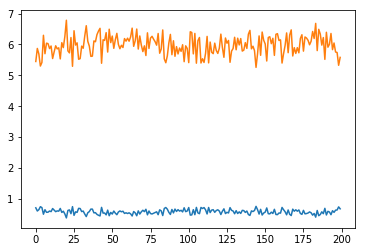

In [4]:
print("autoencoder")
N_epochs = 200
    
autoencoder, encoder = utils.buildNetwork(X.shape[1], encoding_dim_ae = 2)
#autoencoder, encoder = utils.buildNetwork2_deep(X.shape[1], enc_dim1 = 10, enc_dim2 = 1)
autoencoder.summary()

# https://stackoverflow.com/a/43549608/4126114
import keras
tensorboard = keras.callbacks.TensorBoard(log_dir='/tmp/tb/r13-dim-2-epochs200',
                 histogram_freq=1, 
                 write_graph=True, 
                 write_images=False)

X_rec = utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=2, callbacks=[tensorboard])    

AE1 mse1 =  0.0791633830612
AE1 mse2 =  0.013150837594
AE1 mse3 =  0.0132869361733
AE1 mse4 =  0.013019905849


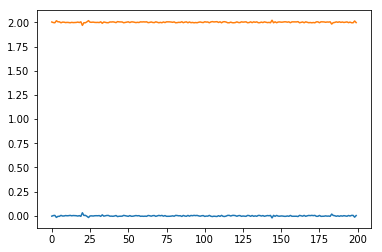

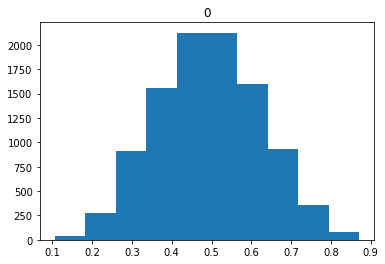

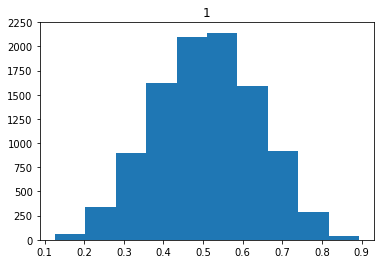

In [5]:
print("AE1 mse1 = ", utils.mse(X, utils.myNorm3(X_rec)))
print("AE1 mse2 = ", utils.mse(X, X_rec))
print("AE1 mse3 = ", utils.mse(X[:,0], X_rec[:,0]))
print("AE1 mse4 = ", utils.mse(X[:,1], X_rec[:,1]))
utils.myPlot(X_rec-X,2)
for i in range(2):
    plt.hist(X_rec[:,i])
    plt.title(i)
    plt.show()